In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import csv

In [2]:
def process_df(path):
    data = pd.read_csv(path)
    data.drop(data.columns[0], axis=1, inplace=True)
    data = data[2:]
    data.reset_index(drop=True, inplace=True)

    num_metrics = len(data.columns) // 4
    metric_names = [name for name in data.columns[:num_metrics]]
    agg_names = ['mean', 'min', 'max', 'std']

    # convert all values to float
    for col in data.columns:
        data[col] = data[col].astype(float)

    dfs = {}
    for i, metric in enumerate(metric_names):
        metric_data = data[data.columns[i::num_metrics]]
        metric_data.columns = agg_names 
        dfs[metric] = metric_data
    
    return dfs

In [7]:
# example = 'MNIST'
example = 'ModelNet10'
# experiment = "comparison"
# experiment = "action_ablation3"
experiment = "action_ablation_littleangles"

# sub_experiment = 'Encoder'
sub_experiment = 'Classifier-n1'
# sub_experiment = 'Classifier-n10'
# sub_experiment = 'Classifier-n100'
# sub_experiment = 'Classifier-n50'
# sub_experiment = 'Classifier-n1000'

path = f"out/{example}/logs/agg/{experiment}/{sub_experiment}/"
trials = os.listdir(path)
experiment_data = {}
for trial in trials:
    print(trial)
    trial_path = path + trial + '/reduction.csv'
    if os.path.exists(trial_path):
        experiment_data[trial] = process_df(trial_path)

GPA
GPA - no_actions
JEPA
JEPA - no_actions


In [8]:
for k, v in experiment_data.items():
    print('metrics:')
    for metric in v.keys():
        print(f"{metric}")
    break

metrics:
train/loss
train/accuracy
val/loss
val/accuracy
test/accuracy


In [9]:
# print mean test accuracies 
data = {}
for experiment in experiment_data.keys():
    # print(f"Experiment: {experiment}")
    # metric = 'val/feature_entropy'
    # metric = 'val/feature_std'
    # metric = 'val/1step_accuracy'
    metric = 'test/accuracy'
    if metric in experiment_data[experiment].keys():
        print(f"{experiment}: {experiment_data[experiment][metric]['mean'][0]*100:.1f}")# +- {experiment_data[experiment][metric]['std'][0]}")
        data[experiment] = experiment_data[experiment][metric]['mean']


GPA: 33.3
GPA - no_actions: 35.3
JEPA: 46.8
JEPA - no_actions: 45.0


Text(0, 0.5, 'Validation Accuracy')

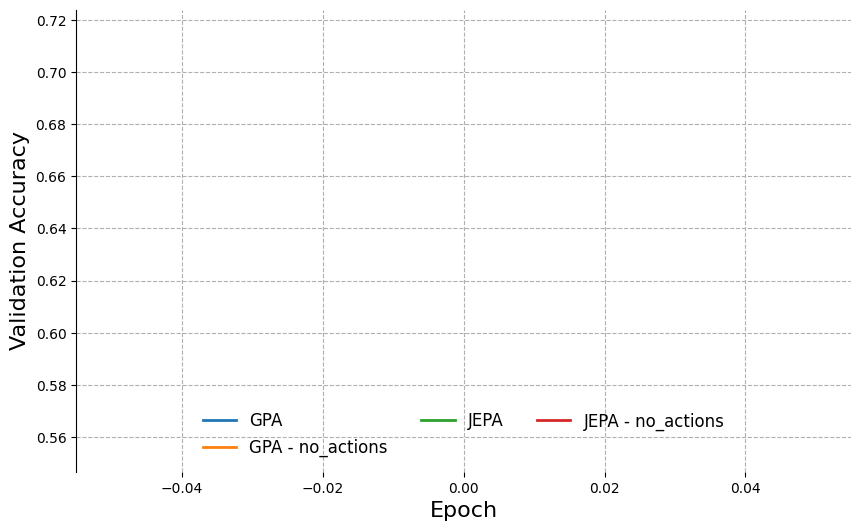

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def smooth_data(data, alpha=0.1):
    smoothed_data = {}
    for k, v in data.items():
        smoothed = [v[0]]
        for i in range(1, len(v)):
            smoothed.append(alpha * v[i] + (1 - alpha) * smoothed[i-1])
        smoothed_data[k] = smoothed
    return smoothed_data


smoothed_data = smooth_data(data)

fig, ax = plt.subplots(figsize=(10, 6))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(True, linestyle='--')

for k, v in smoothed_data.items():
    ax.plot(v, label=k, linewidth=2)
ax.legend(loc='lower center', frameon=False, ncol=3, fontsize=12)  # Move the legend to the top right
ax.set_xlabel('Epoch', fontsize=16)
ax.set_ylabel('Validation Accuracy', fontsize=16)

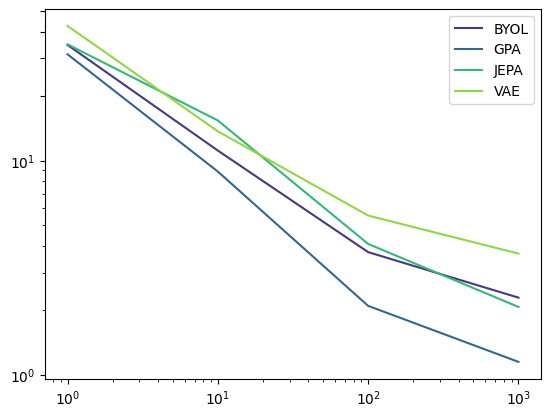

In [93]:
example = 'MNIST'
experiment = "comparison"

sub_experiments = ['Classifier-n1', 'Classifier-n10', 'Classifier-n100', 'Classifier-n1000']

xs = [1, 10, 100, 1000]
data = {}

for i, sub_experiment in enumerate(sub_experiments):
    path = f"out/{example}/logs/agg/{experiment}/{sub_experiment}/"
    trials = os.listdir(path)
    experiment_data = {}
    for trial in trials:
        # print(trial)
        trial_path = path + trial + '/reduction.csv'
        if os.path.exists(trial_path):
            experiment_data[trial] = process_df(trial_path)
        
    if i == 0:
        for exp in experiment_data.keys():
            data[exp] = [experiment_data[exp]['test/accuracy']['mean'][0]]
    else:
        for exp in experiment_data.keys():
            data[exp].append(experiment_data[exp]['test/accuracy']['mean'][0])

for key in data.keys():
    data[key] = [100.0 * (1.0 - x) for x in data[key]]

skip_keys = ['AE', 'iJEPA']
colors = plt.get_cmap('viridis')
for i, key in enumerate(data.keys()):
    if key in skip_keys:
        continue
    plt.plot(xs, data[key], label=key, color=colors(i/len(data.keys())))
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xticks([1, 10, 100, 1000])
# plt.yticks([50, 40, 30, 20, 10, 0])
plt.yticks([1, 10, 20, 30, 40, 50])
plt.show()





In [72]:
print([100 - x for x in data['JEPA']])


[65.11799454689026, 84.61599588394165, 95.91999650001526, 97.92799472808838]


BYOL-n1
BYOL-n10
BYOL-n100
HEPA-0-n1
HEPA-0-n10
HEPA-0-n100
HEPA-L-n1
HEPA-L-n10
HEPA-L-n100
[0.7514599323272705, 0.926159930229187, 0.98013995885849] [0.02202824299699777, 0.004471891942240052, 0.0008848492900169301]


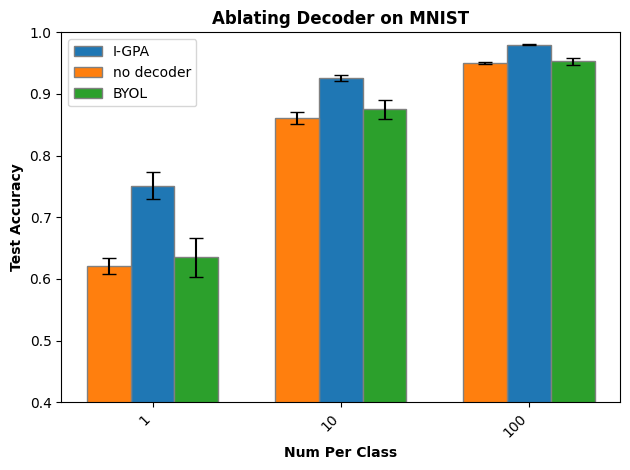

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming classifier_data is already defined as per your structure
# classifier_data is a dictionary with keys like 'base-n1', 'no_actions-n1'
# each value is a dictionary with keys like 'test_acc', where each value is a pandas dataframe

# Extract test accuracies and organize by nX
test_accs_by_n = {'n1': {'I-GPA': None, 'no_decoder': None, 'BYOL': None},
                  'n10': {'I-GPA': None, 'no_decoder': None, 'BYOL': None},
                  'n100': {'I-GPA': None, 'no_decoder': None, 'BYOL': None}}
                #   'n1000': {'I-GPA': None, 'no_decoder': None, 'BYOL': None}}

test_acc_std_by_n = {'n1': {'I-GPA': None, 'no_decoder': None, 'BYOL': None},
                     'n10': {'I-GPA': None, 'no_decoder': None, 'BYOL': None},
                     'n100': {'I-GPA': None, 'no_decoder': None, 'BYOL': None}}
                    #  'n1000': {'I-GPA': None, 'no_decoder': None, 'BYOL': None}}

for key, trial in experiment_data.items():
    test_acc_value = trial['val/1step_acc']['mean'].iloc[0]
    test_acc_std = trial['val/1step_acc']['std'].iloc[0]
    algs = ['I-GPA', 'no_decoder', 'BYOL']
    algs_to_trial = {
        'I-GPA': 'HEPA-0',
        'no_decoder': 'HEPA-L',
        'BYOL': 'BYOL'
    }
    print(key)
    for alg in algs:
        if algs_to_trial[alg] in key:
            n_key = key.split('-')[-1]
            test_accs_by_n[n_key][alg] = test_acc_value
            test_acc_std_by_n[n_key][alg] = test_acc_std

# Prepare data for plotting
nX_labels = list(test_accs_by_n.keys())

igpa_values = [test_accs_by_n[n]['I-GPA'] for n in nX_labels]
igpa_std = [test_acc_std_by_n[n]['I-GPA'] for n in nX_labels]
print(igpa_values, igpa_std)

no_decoder_values = [test_accs_by_n[n]['no_decoder'] for n in nX_labels]
no_decoder_std = [test_acc_std_by_n[n]['no_decoder'] for n in nX_labels]

byol_values = [test_accs_by_n[n]['BYOL'] for n in nX_labels]
byol_std = [test_acc_std_by_n[n]['BYOL'] for n in nX_labels]

# Define bar width
bar_width = 0.2333

# Define the positions of the bars
r1 = np.arange(len(nX_labels)) - bar_width/2
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot bars
fig, ax = plt.subplots()
bars1 = ax.bar(r2, igpa_values, yerr=igpa_std, width=bar_width, edgecolor='grey', label='I-GPA', capsize=5)
bars2 = ax.bar(r1, no_decoder_values, yerr=no_decoder_std, width=bar_width, edgecolor='grey', label='no decoder', capsize=5)
bars3 = ax.bar(r3, byol_values, yerr=byol_std, width=bar_width, edgecolor='grey', label='BYOL', capsize=5)

# Add labels and title
ax.set_xlabel('Num Per Class', fontweight='bold')
ax.set_ylabel('Test Accuracy', fontweight='bold')
ax.set_title('Ablating Decoder on MNIST', fontweight='bold')
ax.set_xticks([r + bar_width / 2 for r in range(len(nX_labels))])
# ax.set_xticklabels(nX_labels)
ax.set_xticklabels(['1', '10', '100'])

# Add legend
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0.4, 1.0)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


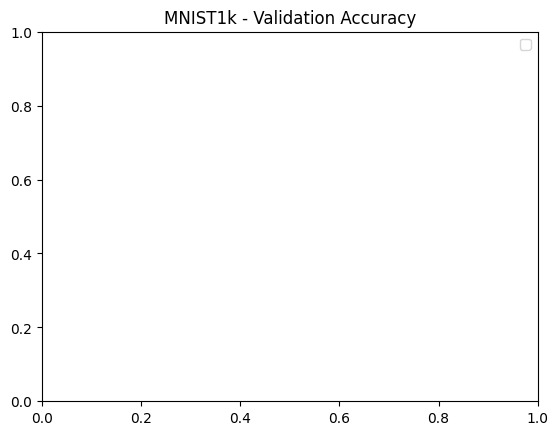

In [4]:
for key in encoder_data.keys():
    plt.plot(encoder_data[key]['1step_val_acc']['mean'], label=key)
    plt.fill_between(encoder_data[key]['1step_val_acc'].index, encoder_data[key]['1step_val_acc']['min'], encoder_data[key]['1step_val_acc']['max'], alpha=0.5)

plt.title('MNIST1k - Validation Accuracy')
plt.legend()
plt.show()


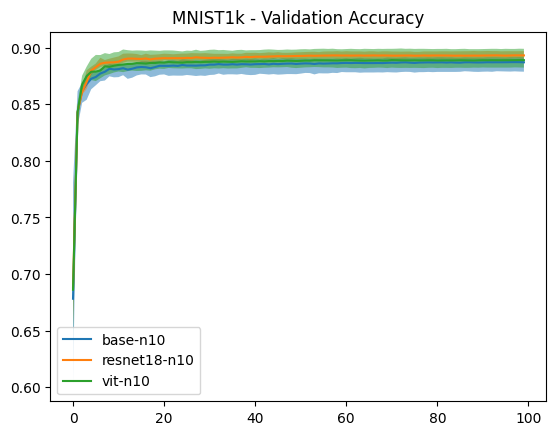

In [12]:
for key in encoder_data.keys():
    plt.plot(classifier_data[key]['val_acc']['mean'], label=key)
    plt.fill_between(classifier_data[key]['val_acc'].index, classifier_data[key]['val_acc']['min'], classifier_data[key]['val_acc']['max'], alpha=0.5)

plt.title('MNIST1k - Validation Accuracy')
plt.legend()
plt.show()